In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
OUT_DIR = "dados/contagem/"
df_equip = pd.read_json(OUT_DIR + 'equipamentos_contagem.json')

In [3]:
df_equip.head()

,idEquipamento,localizacao,localizacaoCombo,uf,municipio,km,br,latitude,longitude,codEquipamento,snv,dtInicioOperacao,dtInicioOperacaoFmt,duplo
0,181,BR-040/MG km 145,BR-040/MG km 145,MG,João Pinheiro,145.0,40,-17.757386,-46.159294,4008,150,2014-05-02T00:00:00,02/05/2014,False
1,261,BR-040/MG km 419,BR-040/MG km 419,MG,Curvelo,419.0,40,-19.155558,-44.562164,40044,230,2014-09-19T00:00:00,19/09/2014,False
2,246,BR-040/MG km 500,BR-040/MG km 500,MG,Esmeraldas,500.0,40,-19.705209,-44.169716,40073,330,2014-08-04T00:00:00,04/08/2014,True
3,188,BR-040/MG km 551,BR-040/MG km 551,MG,Nova Lima,551.0,40,-20.054947,-43.972397,40062,400,2014-05-29T00:00:00,29/05/2014,True
4,187,BR-040/MG km 579,BR-040/MG km 579,MG,Itabirito,579.0,40,-20.289733,-43.938575,40052,410,2014-05-29T00:00:00,29/05/2014,True


In [4]:
df_equip_mg = df_equip[df_equip.uf == 'MG']
df_equip_mg.to_csv(OUT_DIR + 'equipamentos_contagem_mg.csv')

In [5]:
import mplleaflet

In [6]:
plt.scatter(df_equip_mg.longitude, df_equip_mg.latitude)
mplleaflet.display()

C:\Anaconda3\envs\rodovias\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Lendo contagens de MG

In [7]:
from  pathlib import Path
arquivos = Path(OUT_DIR)
df_mg = pd.concat(list([pd.read_json(f) for f 
                        in arquivos.glob('MG*contagem.json')]))
df_mg                        

,idSumVH,idEquipamento,sentido,ano,mes,dia,hora,valorVH,a,b,c,d,e,f,g,h,i,j,l
0,11283655,189,C,2014,6,1,0,31,3,11,3,4,2,1,0,0,7,0,0
1,4236147,189,D,2014,6,1,0,24,2,7,0,1,2,1,0,0,11,0,0
2,9897719,189,C,2014,6,1,1,23,2,10,2,3,1,0,0,0,5,0,0
3,783277,189,D,2014,6,1,1,30,2,13,0,3,2,0,0,0,8,2,0
4,4234082,189,C,2014,6,1,2,24,2,14,2,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74875,8350778,232,D,2018,12,30,21,214,3,5,3,0,2,2,0,0,193,5,1
74876,4086359,232,C,2018,12,30,22,137,3,7,0,0,0,1,0,0,123,1,2
74877,801939,232,D,2018,12,30,22,170,4,5,3,1,4,2,0,1,137,8,5
74878,9025079,232,C,2018,12,30,23,87,3,5,2,1,2,1,0,0,65,3,5


In [8]:
df_mg.groupby('ano')['valorVH'].sum()

ano
2014     72917927
2015    138197873
2016    142047411
2017    161514813
2018    142527135
Name: valorVH, dtype: int64

Qual o total de equipamentos funcionando?

In [9]:
df_mg.idEquipamento.unique().size

57

In [10]:
df_mensal = df_mg.groupby(['idEquipamento', 'ano', 'mes'])[['valorVH']].sum().rename(columns={'idSumVH': 'n_veiculos'})
df_mensal

valorVH
idEquipamento ano  mes         
173           2014 5     133384
                   6     126750
                   7     124231
                   8     134731
                   9     126566
...                         ...
467           2018 6     126316
                   10    108128
                   11    128755
                   12    130046
546           2017 8      70660

[1660 rows x 1 columns]

In [11]:
ano_inicial = df_mg.ano.min()


In [12]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [47]:
ax.set?

Signature: ax.set(**kwargs)
Docstring: A property batch setter.  Pass *kwargs* to set properties.
File:      c:\anaconda3\envs\rodovias\lib\site-packages\matplotlib\artist.py
Type:      method


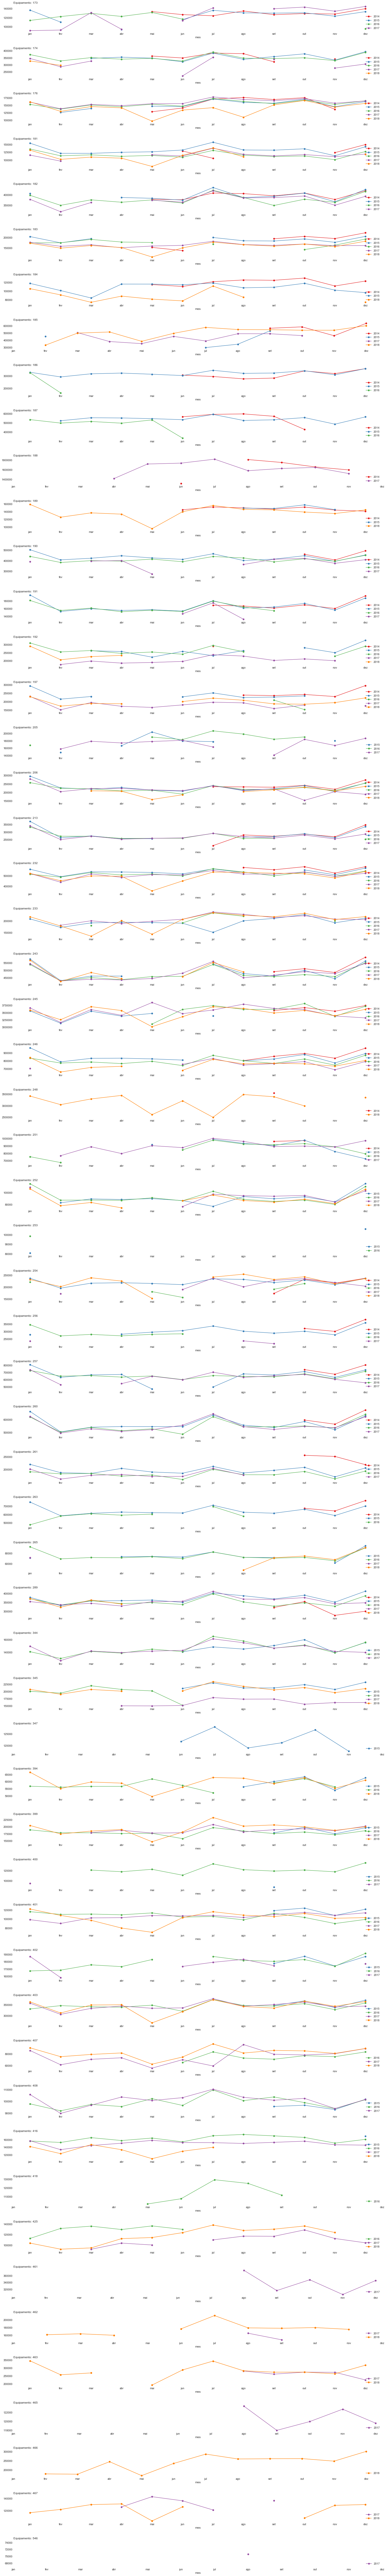

In [74]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(nrows=len(df_mensal.index.levels[0]), figsize=(15,190))
fig.subplots_adjust(hspace=.7,right=1.5)
grouped = df_mensal.groupby(level=0)
for ax, (id_equip, df) in zip(axes, grouped):
    ddf =df.unstack(level=1).droplevel(0).droplevel(0, axis=1).reindex(range(1,13))
    ax.set_title(f"Equipamento: {id_equip}", x=0, ha='left')
    #display(ddf)
    cores = [plt.cm.Set1.colors[i-ano_inicial] for i in ddf.columns]
    ddf.plot.line(ax=ax, color=cores, grid=False, linestyle='-', marker='o')
    ax.set(frame_on=False, 
           xticks=range(1,13),
           xticklabels=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
    #ax.xticks(range(13), , ])
    #ax.xaxis.set_ticklabels()
    ax.legend(loc="lower right")
    
    
    
    


## Comparando com PIB

Experimentar: 
- [Pib de MG][https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=series-historicas&utm_source=landing&utm_medium=explica&utm_campaign=pib].
- PIB mensal (usando lib sgs que baixa dados BC)

In [184]:
import sgs
COD_PIB_MENSAL_DOLAR = 4385
COD_PIB_MENSAL_CORRENTE = 4380 #Sem correção
COD_IPCA = 433
ts_pib_mensal = sgs.time_serie(COD_PIB_MENSAL_DOLAR, '01/01/2014', '31/12/2018')

In [178]:
ts_pib_mensal

2014-01-01    460550.4
2014-02-01    456108.9
2014-03-01    469286.1
2014-04-01    476296.7
2014-05-01    480664.1
2014-06-01    465327.6
2014-07-01    490266.0
2014-08-01    485880.8
2014-09-01    485979.5
2014-10-01    502784.5
2014-11-01    498050.2
2014-12-01    507758.3
2015-01-01    481108.8
2015-02-01    467039.1
2015-03-01    508688.9
2015-04-01    493513.7
2015-05-01    491297.6
2015-06-01    495319.6
2015-07-01    511118.3
2015-08-01    501228.5
2015-09-01    495873.0
2015-10-01    517798.1
2015-11-01    512521.2
2015-12-01    520280.4
2016-01-01    489390.3
2016-02-01    491500.3
2016-03-01    518592.4
2016-04-01    509771.9
2016-05-01    513180.1
2016-06-01    535333.6
2016-07-01    532215.9
2016-08-01    533785.3
2016-09-01    511223.0
2016-10-01    526136.3
2016-11-01    541315.6
2016-12-01    566883.2
2017-01-01    528457.5
2017-02-01    515525.2
2017-03-01    545231.7
2017-04-01    525794.8
2017-05-01    549708.5
2017-06-01    558148.0
2017-07-01    558824.7
2017-08-01 

In [136]:
tx_trafego = df_mensal.unstack(level=1).droplevel(0, axis=1).pct_change(axis=1, fill_method=None).dropna(axis=1, how='all').stack()#.reset_index(level=1)
#tx_trafego.name = 'crescimento tráfego no mês'
tx_trafego

idEquipamento  mes  ano 
173            1    2016   -0.165667
                    2017   -0.196403
               2    2016    0.110556
                    2017   -0.242539
               3    2017    0.011978
                              ...   
463            11   2018   -0.034126
               12   2018    0.412095
467            4    2018    0.038601
               5    2018   -0.274953
               6    2018   -0.072086
Length: 916, dtype: float64

In [187]:
def monta_df_variacoes(ts_economia, tx_trafego):
    df_pct_change = ts_economia.pct_change(periods=12).dropna()
    df_pct_change.name = 'Variação econômica'
    reseted = tx_trafego.reset_index(level=[1,2]).assign(dia=1).rename(columns={'ano':'year', 'mes':'month', 'dia':'day', 0:'tx_veiculo'})
    reseted['period'] = pd.to_datetime(reseted.loc[:, ['year', 'month', 'day']])
    return reseted.merge(df_pct_change, right_index=True, left_on='period')

df_variacoes = monta_df_variacoes(ts_pib_mensal, tx_trafego)
df_variacoes

,month,year,tx_veiculo,day,period,Variação econômica
idEquipamento,,,,,,
173,1,2016,-0.165667,1,2016-01-01,-0.033235
181,1,2016,-0.121423,1,2016-01-01,-0.033235
182,1,2016,-0.021120,1,2016-01-01,-0.033235
183,1,2016,-0.148005,1,2016-01-01,-0.033235
186,1,2016,-0.011219,1,2016-01-01,-0.033235
...,...,...,...,...,...,...
399,12,2018,-0.009983,1,2018-12-01,-0.103577
401,12,2018,-0.093486,1,2018-12-01,-0.103577
403,12,2018,0.060039,1,2018-12-01,-0.103577


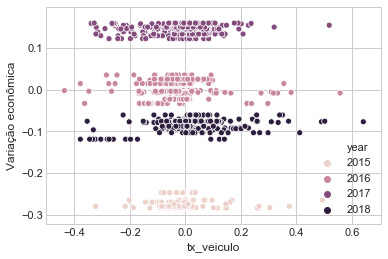

In [189]:
sns.scatterplot(data=df_variacoes, x='tx_veiculo', y='Variação econômica', hue='year');

In [194]:
ts_pib_variacao.resample('Y').apply(lambda x: x.describe())

2015-12-31  count    12.000000
            mean     -0.268252
            std       0.015417
            min      -0.284605
            25%      -0.280254
            50%      -0.272319
            75%      -0.263847
            max      -0.233423
2016-12-31  count    12.000000
            mean      0.002411
            std       0.020310
            min      -0.033235
            25%      -0.007049
            50%      -0.003126
            75%       0.016734
            max       0.035144
2017-12-31  count    12.000000
            mean      0.145665
            std       0.012259
            min       0.122394
            25%       0.137508
            50%       0.148242
            75%       0.155495
            max       0.159854
2018-12-31  count    12.000000
            mean     -0.086080
            std       0.015970
            min      -0.119086
            25%      -0.094534
            50%      -0.083443
            75%      -0.075918
            max      -0.060940
Name: 43